# CSAL4243: Introduction to Machine Learning
Muhammad Mudassir Khan (mudasssir.khan@ucp.edu.pk)

# Assignment 1: Linear Regression

In this assignment you are going to learn how Linear Regression works by using the code for linear regression and gradient descent we have been looking at in the class. You are also going to use linear regression from [scikit-learn](http://scikit-learn.org/) library for machine learning. You are going to learn how to download data from [kaggle](https://www.kaggle.com/) (a website for datasets and machine learning) and upload submissions to kaggle competitions. And you will be able to compete with the world.

### Overview

- [Pseudocode](#Pseudocode)
- [Tasks](#Tasks)
    - [Load and analyze data](#Load-and-analyze-data)
- [Task 1: Effect of Learning Rate $\alpha$](#Task-1:-Effect-of-Learning-Rate-$\alpha$)
    - [Load X and y](#Load-X-and-y)
    - [Linear Regression with Gradient Descent code](#Linear-Regression-with-Gradient-Descent-code)
    - [Run Gradient Descent on training data](#Run-Gradient-Descent-on-training-data)
    - [Plot trained line on data](#Plot-trained-line-on-data)
- [Task 2: Predict test data output and submit it to Kaggle](#Task-2:-Predict-test-data-output-and-submit-it-to-Kaggle)
    - [Upload .csv file to Kaggle.com](#Upload-.csv-file-to-Kaggle.com)
- [Task 3: Use scikit-learn for Linear Regression](#Task-3:-Use-scikit-learn-for-Linear-Regression)
- [Task 4: Multivariate Linear Regression](#Task-4:-Multivariate-Linear-Regression)
- [Resources](#Resources)
- [Credits](#Credits)

<br>
<br>

# Pseudocode
## Linear Regressio with Gradient Descent 

- Load training data into X_train and y_train
- [Optionally] normalize features X_train using $x^i = \frac{x^i - \mu^i}{\rho^i}$ where $\mu^i$ is mean and $\rho^i$ is standard deviation of feature $i$
- Initialize hyperparameters
    - iterations 
    - learning rate $\alpha$
- Initialize $\theta_s$    
- At each iteration
    - Compute cost using $J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h(x^i) - y^i)^2$ where $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 .... + \theta_n x_n$
    - Update $\theta_s$ using $\begin{align*} \; \; & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x_{i}) - y_{i}) \cdot x^j_{i} \; & & \text{for j := 0...n} \end{align*}$
    - [Optionally] Break if cost $J(\theta)$ does not change.
    

<br>
<br>

# Download House Prices dataset


The dataset you are going to use in this assignment is called [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), available at kaggle. To download the dataset go to dataset data tab. Download 'train.csv', 'test.csv', 'data_description.txt' and 'sample_submission.csv.gz' files. 'train.csv' is going to be used for training the model. 'test.csv' is used to test the model i.e. generalization. 'data_description.txt' contain feature description of the dataset. 'sample_submission.csv.gz' contain sample submission file that you need to generate to be submitted to kaggle.

<br>

# Tasks

1. Effect of Learning Rate $\alpha$ 
2. Predict test data output and submit it to Kaggle
3. Use scikit-learn for Linear Regression
4. Multivariate Linear Regression


## Load and analyze data

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl

# read house_train.csv data in pandas dataframe df_train using pandas read_csv function
df_train = pd.read_csv('datasets/house_price/train.csv', encoding='utf-8')

In [5]:
# check data by printing first few rows
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# check columns in dataset
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

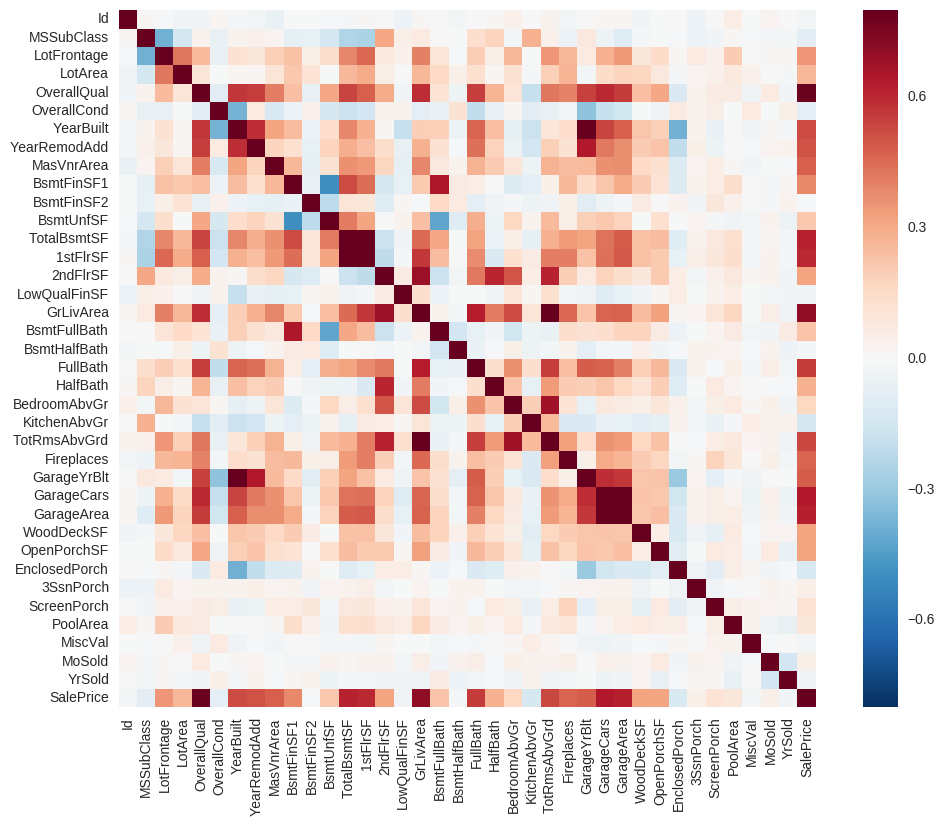

In [7]:
# check correlation matrix, darker means more correlation
corrmat = df_train.corr()
f, aX_train= plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

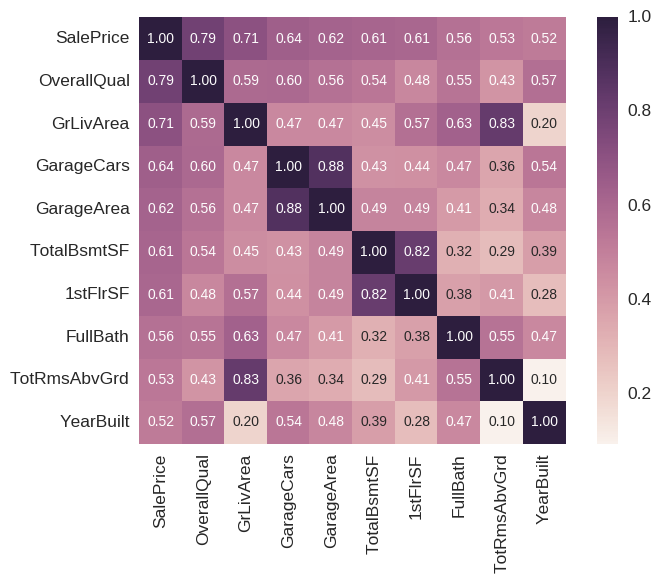

In [8]:
# SalePrice correlation matrix with top k variables
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

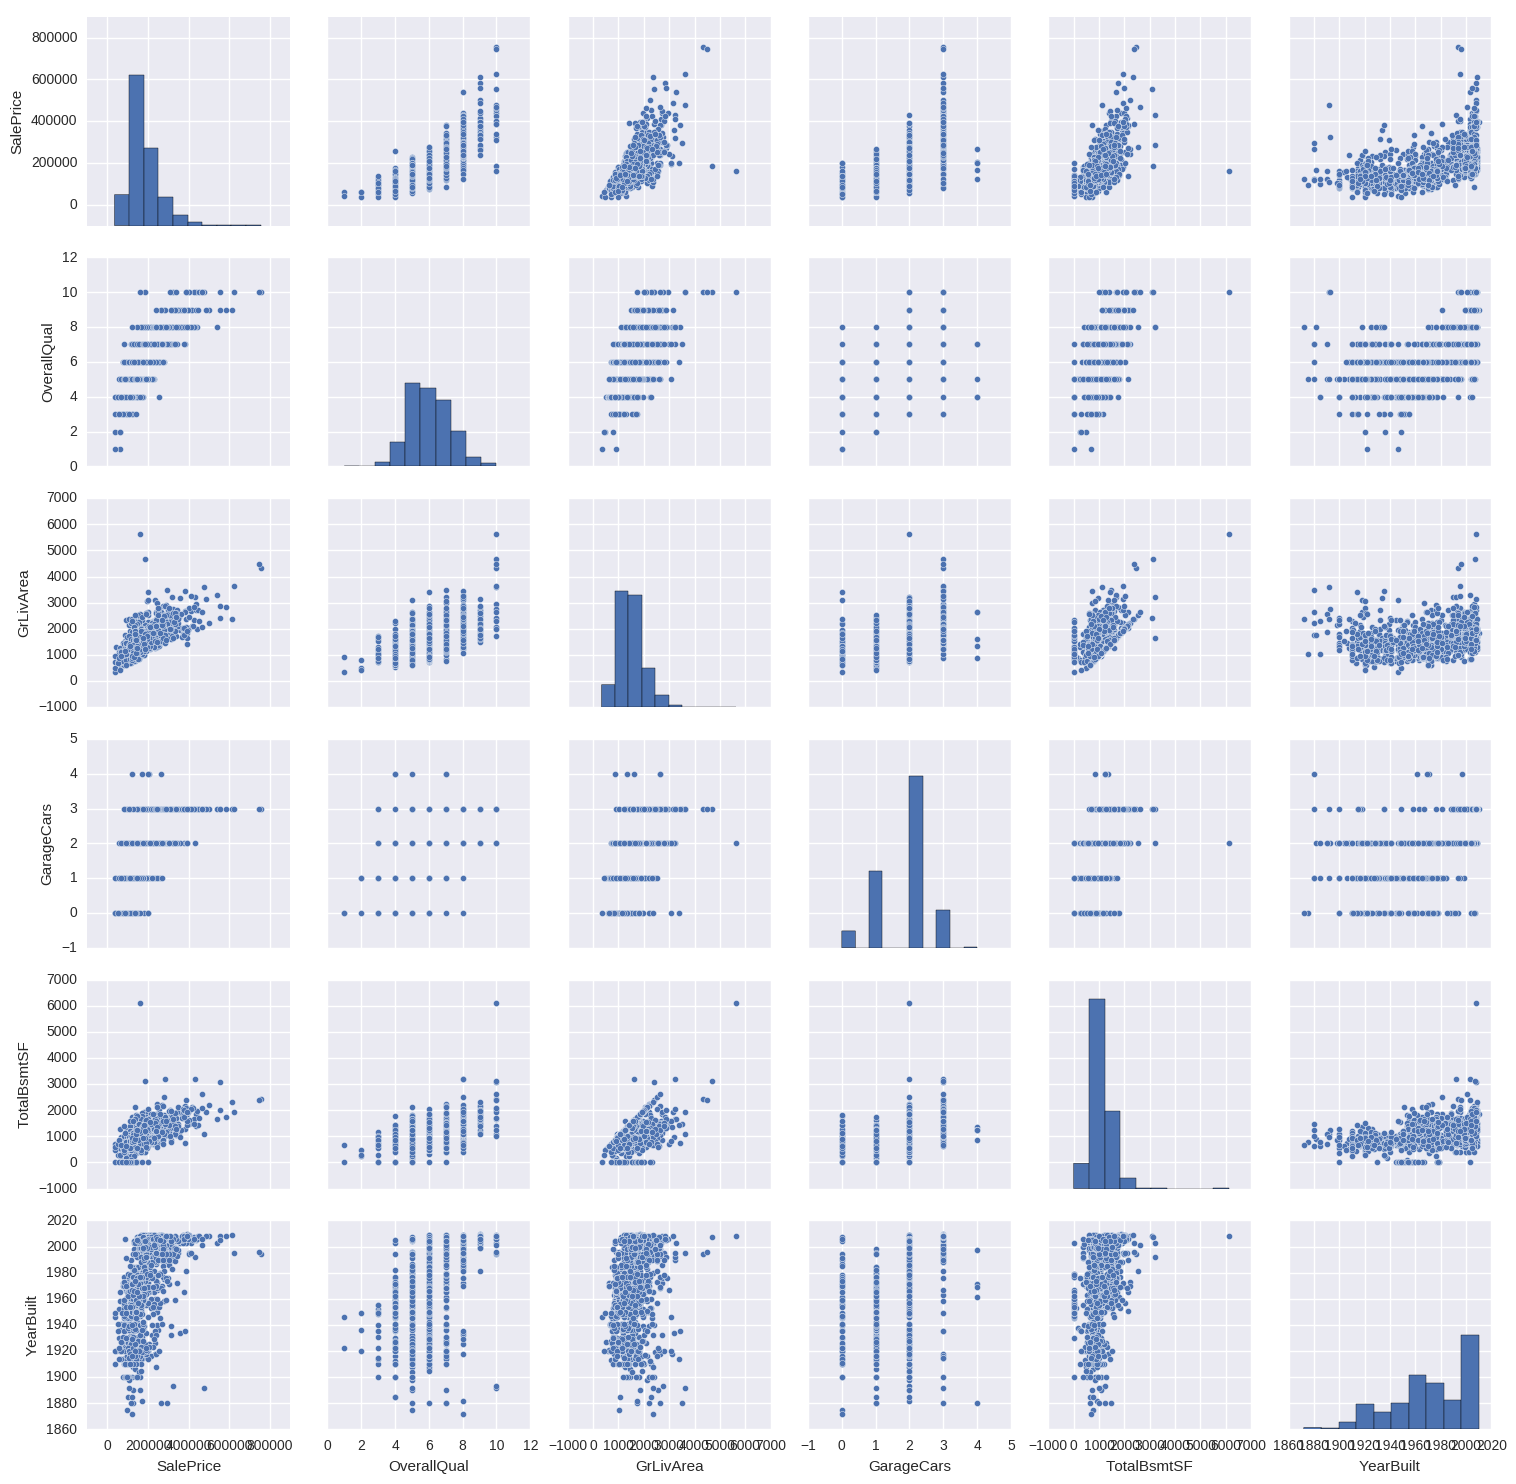

In [9]:
#scatterplot with some important variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.set()
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

<br>
# Task 1: Effect of Learning Rate $\alpha$
Use Linear Regression code below using X="GrLivArea" as input variable and y="SalePrice" as target variable. Use different values of $\alpha$ given in table below and comment on why they are useful or not and which one is a good choice.

- $\alpha=0.000001$:
- $\alpha=0.00000001$:
- $\alpha=0.000000001$:

<br>
## Load X and y

In [7]:
# Load X and y variables from pandas dataframe df_train
cols = ['GrLivArea']
X_train = np.array(df_train[cols])
y_train = np.array(df_train[["SalePrice"]])

# Get m = number of samples and n = number of features
m = X_train.shape[0]
n = X_train.shape[1]

# append a column of 1's to X for theta_0
X_train = np.insert(X_train,0,1,axis=1)

## Linear Regression with Gradient Descent code

In [11]:
iterations = 1500
alpha = 0.000000001 # change it and find what happens

def h(X, theta): #Linear hypothesis function
    hx = np.dot(X,theta)
    return hx


def computeCost(theta,X,y): #Cost function
    """
    theta is an n- dimensional vector, X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(X,theta)-y).T,(h(X,theta)-y)))

#Actual gradient descent minimizing routine
def gradientDescent(X,y, theta_start = np.zeros((n+1,1))):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is input variable matrix with n- columns and m- rows. y is a matrix with m- rows and 1 column.
    """
    theta = theta_start
    j_history = [] #Used to plot cost as function of iteration
    theta_history = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        # append for plotting
        j_history.append(computeCost(theta,X,y))
        theta_history.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(X,theta) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, theta_history, j_history

## Run Gradient Descent on training data

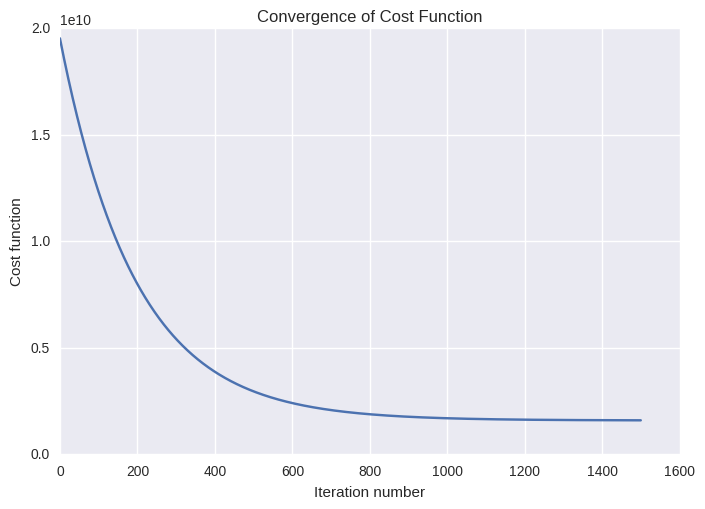

In [12]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((n+1,1));
theta, theta_history, j_history = gradientDescent(X_train,y_train,initial_theta)

plt.plot(j_history)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.show()

## Plot trained line on data

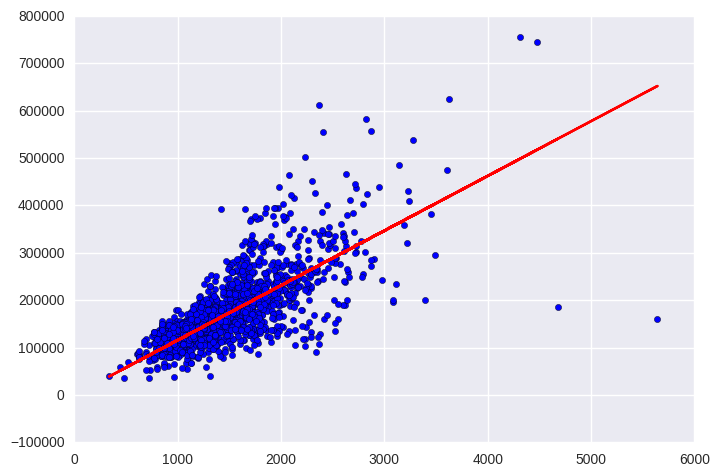

In [13]:
# predict output for training data
hx_train= h(X_train, theta)

# plot it
plt.scatter(X_train[:,1],y_train)
plt.plot(X_train[:,1],hx_train[:,0], color='red')
plt.show()

<br>
# Task 2: Predict test data output and submit it to Kaggle
In this task we will use the model trained above to predict "SalePrice" on test data. Test data has all the input variables/features but no target variable. Out aim is to use the trained model to predict the target variable for test data. This is called generalization i.e. how good your model works on unseen data. The output in the form "Id","SalePrice" in a .csv file should be submitted to kaggle. Please provide your score on kaggle after this step as an image. It will be compared to the 5 feature Linear Regression later.

In [14]:
# read data in pandas frame df_test and check first few rows
    # write code here

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
# check statistics of test data, make sure no data is missing.
print(df_test.shape)
df_test[cols].describe()

(1459, 80)


,GrLivArea
count,1459.000000
mean,1486.045922
std,485.566099
min,407.000000
25%,1117.500000
50%,1432.000000
75%,1721.000000
max,5095.000000


In [16]:
# Get X_test, no target variable (SalePrice) provided in test data. It is what we need to predict.
X_test = np.array(df_test[cols])

#Insert the usual column of 1's into the "X" matrix
X_test = np.insert(X_test,0,1,axis=1)

In [17]:
# predict test data labels i.e. y_test
predict = h(X_test, theta)

In [18]:
# save prediction as .csv file
pd.DataFrame({'Id': df_test.Id, 'SalePrice': predict[:,0]}).to_csv("predict1.csv", index=False)

## Upload .csv file to Kaggle.com

- Create an account at https://www.kaggle.com
- Go to https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit
- Upload "predict1.csv" file created above.
- Upload your score as an image below.

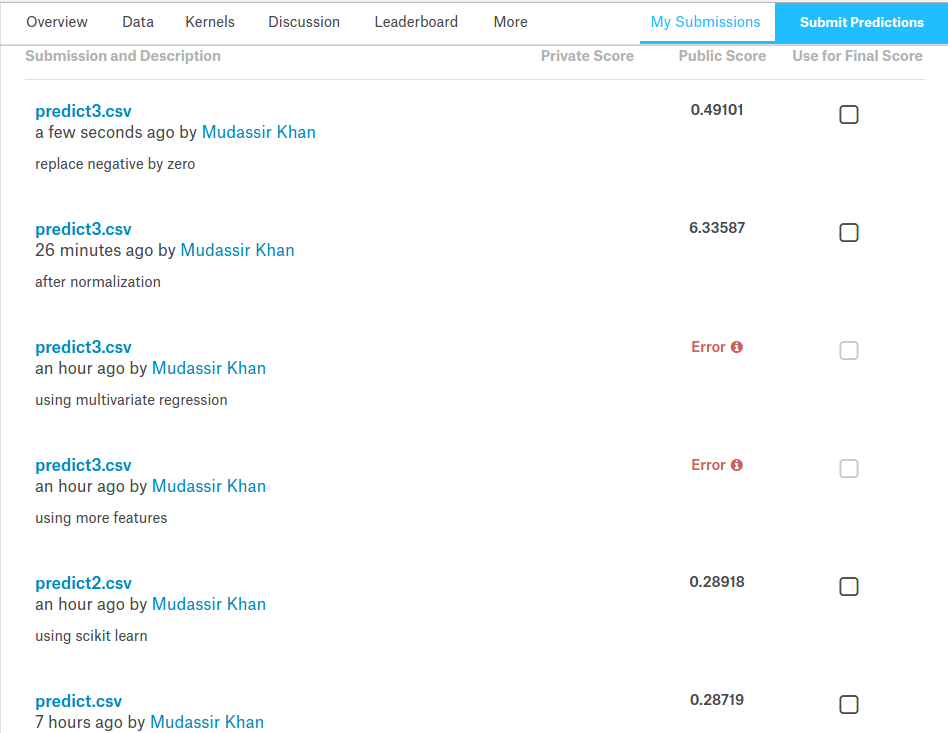

In [19]:
from IPython.display import Image
Image(filename='images/asgn_01.png', width=500)

<br>
# Task 3: Use scikit-learn for Linear Regression

In this task we are going to use [Linear Regression class from scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) library to train the same model. The aim is to move from understanding algorithm to using an exisiting well established library. There is a [Linear Regression example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) available on scikit-learn website as well.

- Use the scikit-learn linear regression class to train the model on df_train
- Compare the parameters from scikit-learn linear_model.LinearRegression.coef_ to the $\theta_s$ from earlier. 
- Use the linear_model.LinearRegression.predict on test data and upload it to kaggle. See if your score improves. Provide screenshot.
- Note: no need to append 1's to X_train. Scitkit linear regression has parameter called fit_intercept that is by defauly enabled. 

In [20]:
# import scikit-learn linear model
from sklearn import linear_model

# get X and y
    # write code here


# Create linear regression object
 # write code here check link above for example

# Train the model using the training sets. Use fit(X,y) command
  # write code here

# The coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, y_train))


Intercept: 
 [ 18569.02585649]
Coefficients: 
 [[ 107.13035897]]
Mean squared error: 3139843209.67
Variance score: 0.50


In [21]:
# read test X without 1's
  # write code here

In [22]:
# predict output for test data. Use predict(X) command.
predict2 = # write code here

In [23]:
# remove negative sales by replacing them with zeros
predict2[predict2<0] = 0

In [24]:
# save prediction as predict2.csv file
   # write code here

<br>
# Task 4: Multivariate Linear Regression

Lastly use columns ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt'] and scikit-learn or the code given above to predict output on test data. Upload it to kaggle like earlier and see how much it improves your score.

- Everything remains same except dimensions of X changes.
- There might be some data missing from the test or train data that you can check using pandas.DataFrame.describe() function. Below we provide some helping functions for removing that data.

In [25]:
# define columns ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
    # write code here

# check features range and statistics. Training dataset looks fine as all features has same count.
df_train[cols].describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1971.267808
std,1.382997,525.480383,0.747315,438.705324,30.202904
min,1.000000,334.000000,0.000000,0.000000,1872.000000
25%,5.000000,1129.500000,1.000000,795.750000,1954.000000
50%,6.000000,1464.000000,2.000000,991.500000,1973.000000
75%,7.000000,1776.750000,2.000000,1298.250000,2000.000000
max,10.000000,5642.000000,4.000000,6110.000000,2010.000000


In [26]:
# Load X and y variables from pandas dataframe df_train
    # write code here

# Get m = number of samples and n = number of features
    # write code here

In [27]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = np.array(X_train).copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column if 1's
#     if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]
    
# check data after normalization
pd.DataFrame(data=Xnorm,columns=cols).describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.083562,0.036301,-0.232877,0.069863,0.013014
std,0.655971,0.732612,0.747315,0.717391,0.734330
min,-3.000000,-2.000000,-2.000000,-2.000000,-3.000000
25%,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,7.000000,2.000000,11.000000,1.000000


In [28]:
# Run Linear Regression from scikit-learn or code given above. 

    # write code here. Repeat from above.


Intercept: 
 [-672030.53248541]
Coefficients: 
 [[ 20391.14093374     50.83150559  14510.0032998      29.97787732
     301.43341059]]
Mean squared error: 1463421280.61
Variance score: 0.77


In [29]:
# To predict output using  ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt'] as input features.
# Check features range and statistics to see if there is any missing data. 
# As you can see from count "GarageCars" and "TotalBsmtSF" has 1 missing value each.
df_test[cols].describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt
count,1459.000000,1459.000000,1458.000000,1458.000000,1459.000000
mean,6.078821,1486.045922,1.766118,1046.117970,1971.357779
std,1.436812,485.566099,0.775945,442.898624,30.390071
min,1.000000,407.000000,0.000000,0.000000,1879.000000
25%,5.000000,1117.500000,1.000000,784.000000,1953.000000
50%,6.000000,1432.000000,2.000000,988.000000,1973.000000
75%,7.000000,1721.000000,2.000000,1305.000000,2001.000000
max,10.000000,5095.000000,5.000000,5095.000000,2010.000000


In [30]:
# Replace missing value with the mean of the feature
df_test['GarageCars'] = df_test['GarageCars'].fillna((df_test['GarageCars'].mean()))
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna((df_test['TotalBsmtSF'].mean()))

In [31]:
df_test[cols].describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1486.045922,1.766118,1046.117970,1971.357779
std,1.436812,485.566099,0.775679,442.746712,30.390071
min,1.000000,407.000000,0.000000,0.000000,1879.000000
25%,5.000000,1117.500000,1.000000,784.000000,1953.000000
50%,6.000000,1432.000000,2.000000,988.000000,1973.000000
75%,7.000000,1721.000000,2.000000,1304.000000,2001.000000
max,10.000000,5095.000000,5.000000,5095.000000,2010.000000


In [32]:
# read test X without 1's
  # write code here

# predict using trained model
predict3 = # write code here

# replace any negative predicted saleprice by zero
predict3[predict3<0] = 0


In [33]:
# predict target/output variable for test data using the trained model and upload to kaggle.
  # write code to save output as predict3.csv here

# Resources

Course website: [https://w4zir.github.io/ml17s/](https://w4zir.github.io/ml17s/)

[Course resources](https://github.com/w4zir/ml17s)

# Credits
Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015. Print.

[Andrew Ng, Machine Learning, Coursera](#https://www.coursera.org/learn/machine-learning)

[Scikit Learn Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)